#Tutorial 2 - Regression

1. Design a linear neuron to perform the following mapping:



| 𝒙 = (𝑥1, 𝑥2, 𝑥2)  | y   |
|------|------|
|   (0.09 −0.44 −0.15)  | −2.57 |
|(0.69 −0.99 −0.76)| −2.97 |
|(0.34 0.65 −0.73) | 0.96 |
|(0.15 0.78 −0.58) | 1.04 |
|(−0.63 −0.78 −0.56) | −3.21 |
|(0.96 0.62 −0.66) | 1.05 |
|(0.63 −0.45 −0.14) | −2.39 |
|(0.88 0.64 −0.33) | 0.66 |

Show one iteration of learning of the neuron with 

&emsp;(a) Stochastic gradient descent learning <br>
&emsp;(b) Gradient descent learning <br>

Initialize the weights randomly and biases to 0.0 and use a leaning factor 𝛼 = 0.01.

Plot the learning curves (mean square error vs. epochs) until convergence.
Determine the learned weights, biases, and the predicted values of 𝑦 by the neuron.

#Solution

##Step 1: We initialise our training data.

<em>You can run code in Jupyter Notebook by selecting code cells & pressing Shift-Enter.</em>

In [0]:
#import dependencies

import tensorflow as tf
import numpy as np
import pylab as plt

In [0]:
# Initialise training data
X = np.array([[0.09, -0.44, -0.15],
              [0.69, -0.99, -0.76],
              [0.34, 0.65, -0.73],
              [0.15, 0.78, -0.58],
              [-0.63, -0.78, -0.56],
              [0.96, 0.62, -0.66],
              [0.63, -0.45, -0.14],
              [0.88, 0.64, -0.33]])
Y = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66])


##Step 2: We randomly assign weights.

The code below is optional. We run this code if we want the same random weights as the solution. 

In [0]:
SEED = 10
np.random.seed(SEED)

Randomise weights.

In [0]:
# Model parameters
w = tf.Variable(np.random.rand(3), dtype=tf.float32)
b = tf.Variable(0., dtype=tf.float32)

##Step 3: We model our linear neuron.

Given a training dataset 


\begin{equation*}
\left\{ \left(   x_p, d_p \right) \right\}^P_{p=1}
\end{equation*} 

 

Set learning parameter $\alpha$

Initialize $w$ and $b$

Repeat until convergence: <br>
&emsp;For every training pattern ($x_p$, $d_p$):

&emsp;&emsp; Synaptic input $y_p$ = $x_p^Tw + b$ <br>
&emsp;&emsp; $w$ $\leftarrow$ $w + \alpha (d_p - y_p)x_p $ <br>
&emsp;&emsp; $b$ $\leftarrow$ $b + \alpha (d_p - y_p) $ <br>

In [0]:
#learning rate, {a}
lr = 0.01

# Model input and output
x = tf.placeholder(tf.float32, [3])
d = tf.placeholder(tf.float32)

y = tf.tensordot(x, w, axes=1) + b
loss = tf.square(d - y) # sum of the squares

# optimizer
grad_w = -(d - y)*x
grad_b = -(d - y)
w_new = w.assign(w - lr*grad_w)
b_new = b.assign(b - lr*grad_b)

##Step 4: Initialise tensorflow session

In [0]:
# Initaliaise tf session
init = tf.global_variables_initializer()
sess = tf.Session()

Lets take a look at our initial random weights.



In [7]:
sess.run(init) # evaluate initial weights
w_, b_ = sess.run([w, b])
print('w: {}, b: {}'.format(w_, b_))

w: [0.77132064 0.02075195 0.6336482 ], b: 0.0


We should have $w = \begin{bmatrix}
    0.77        \\
    0.02        \\
    0.63
\end{bmatrix}, b =0.0 $

##Step 5: Training 1 pattern

We shuffle the inputs.

In [0]:
#shuffle inputs
idx = np.arange(len(X))
np.random.shuffle(idx)
X, Y = X[idx], Y[idx]

Next, we create the function to train a single pattern.

In [0]:
#function to train a single pattern (acts as a python generator)
def _train1pattern():
  for p in np.arange(len(X)):
    y_, loss_, w_, b_ = sess.run([y, loss, w_new, b_new], {x: X[p], d: Y[p]})
    
    yield [X[p], Y[p], y_, loss_, w_, b_]
    
#start generator
gen = _train1pattern()

Finally, the code below combines the 2 codes above into 1 function.

In [0]:
#square error
err_ = []

#mean square error
mse = []

#iteration
i = 0

#use this function to train a single pattern by calling _trainpattern()
def train1pattern():
  global gen

  output = next(gen, None)
   
  #generator finished, we need to restart generator
  if output is None:
    global X
    global Y
    
    #iterate i
    global i
    i=i+1
    
    #append mean square error & reset square error
    global err_
    mse.append(np.mean(err_))
    err_=[]
    
    #shuffle inputs
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    X, Y = X[idx], Y[idx]
    
    #start generator
    gen = _train1pattern()
    output = next(gen)
    

    
  x_input, d, y_, loss_, w_, b_ = output
  
  err_.append(loss_)
  mydict = {
      'iter': i,
      'x' : x_input,
      'd' : d,
      'y' : y_,
      'loss' : loss_,
      'w' : w_,
      'b' : b_,
      'mse' : mse
      
  }
  
  return mydict

###Pattern 1

Apply $x_p = \begin{bmatrix}
    0.34        \\
    0.65        \\
    −0.73
\end{bmatrix}, d_p =0.96 $


$y_p = x_p^Tw +b = \left( 0.34, 0.65, −0.15 \right)
\begin{bmatrix}
    0.77        \\
    0.02        \\
    0.63
\end{bmatrix} +0.0 = -0.19  $

$s.e. =  (d_p - y_p)^2 = (0.96 + 0.19) = 1.32$

$w$ $\leftarrow$ $w + \alpha (d_p - y_p)x_p = 
\begin{bmatrix}
    0.77        \\
    0.02        \\
    0.63
\end{bmatrix} + 0.01 * \left( 0.96+ 0.19 \right)
\begin{bmatrix}
    0.34        \\
    0.65        \\
    −0.73
\end{bmatrix} = 
\begin{bmatrix}
    0.78        \\
    0.03        \\
    0.63
\end{bmatrix}$  

$b$ $\leftarrow$ $b + \alpha (d_p - y_p)x_p = 
0.0 + 0.01 * \left( 0.96+ 0.19 \right) = 0.01$  



In [11]:
train1pattern()

{'b': 0.011468254,
 'd': 0.96,
 'iter': 0,
 'loss': 1.3152086,
 'mse': [],
 'w': array([0.77521986, 0.02820631, 0.6252764 ], dtype=float32),
 'x': array([ 0.34,  0.65, -0.73]),
 'y': -0.18682542}

After running the code above, we should have  the same results

##Step 6: Training 1 iteration/epoch

We define the function for running 1 iteration as:

In [0]:
def train1epoch(log=False):
    global i
    j=i
    
    while i != j+1:
      results = train1pattern()
      if log: print(results)
      
    del results['x']
    del results['d']
    del results['loss']
    del results['y']
    
    return results

### Iteration 1

| 𝒙   | d   | y | s.e. | w | b |
|------|------|------|------|------|------|
|\begin{bmatrix}
    0.34        \\
    0.65        \\
    −0.73
\end{bmatrix}|0.96|-0.19|1.31|\begin{bmatrix}
    0.78        \\
    0.03        \\
    0.63
\end{bmatrix}|0.01|
|\begin{bmatrix}
    0.63        \\
    −0.45        \\
    −0.14
\end{bmatrix}|-2.39|0.4|7.78|\begin{bmatrix}
    0.76        \\
    0.04        \\
    0.63
\end{bmatrix}|-0.02|
|\begin{bmatrix}
    0.88        \\
    0.64        \\
    −0.33
\end{bmatrix}|0.66|0.47|0.04|\begin{bmatrix}
    0.76        \\
    0.04        \\
    0.63
\end{bmatrix}|-0.01|
|\begin{bmatrix}
    0.96        \\
    0.62        \\
    −0.66
\end{bmatrix}|1.05|0.33|0.52|\begin{bmatrix}
    0.77        \\
    0.05        \\
    0.62
\end{bmatrix}|-0.01|
|\begin{bmatrix}
    0.09        \\
    −0.44        \\
    −0.15
\end{bmatrix}|-2.57|-0.05|6.34|\begin{bmatrix}
    0.76        \\
    0.06        \\
    0.63
\end{bmatrix}|-0.03|
|\begin{bmatrix}
    0.69        \\
    −0.99        \\
    −0.76
\end{bmatrix}|-2.97|-0.04|8.59|\begin{bmatrix}
    0.74        \\
    0.09        \\
    0.65
\end{bmatrix}|-0.06|
|\begin{bmatrix}
    −0.63        \\
    −0.78        \\
    −0.56
\end{bmatrix}|-3.21|-0.96|5.05|\begin{bmatrix}
    0.76        \\
    0.10        \\
    0.66
\end{bmatrix}|-0.08|
|\begin{bmatrix}
    0.15        \\
    0.78        \\
    −0.58
\end{bmatrix}|1.04|-0.27|1.73|\begin{bmatrix}
    0.76        \\
    0.11        \\
    0.65
\end{bmatrix}|-0.07|

<center><b>mse = 3.92</b></center>

In [13]:
train1epoch(log=True)

{'iter': 0, 'x': array([ 0.63, -0.45, -0.14]), 'd': -2.39, 'y': 0.39962524, 'loss': 7.78201, 'w': array([0.7576452 , 0.04075963, 0.62918186], dtype=float32), 'b': -0.016428, 'mse': []}
{'iter': 0, 'x': array([ 0.88,  0.64, -0.33]), 'd': 0.66, 'y': 0.46875593, 'loss': 0.036574304, 'w': array([0.7593281 , 0.04198359, 0.62855077], dtype=float32), 'b': -0.014515558, 'mse': []}
{'iter': 0, 'x': array([ 0.96,  0.62, -0.66]), 'd': 1.05, 'y': 0.32562572, 'loss': 0.52471805, 'w': array([0.76628214, 0.04647471, 0.6237699 ], dtype=float32), 'b': -0.007271816, 'mse': []}
{'iter': 0, 'x': array([ 0.09, -0.44, -0.15]), 'd': -2.57, 'y': -0.05232078, 'loss': 6.3387084, 'w': array([0.7640162 , 0.0575525 , 0.62754637], dtype=float32), 'b': -0.03244861, 'mse': []}
{'iter': 0, 'x': array([ 0.69, -0.99, -0.76]), 'd': -2.97, 'y': -0.03918962, 'loss': 8.58965, 'w': array([0.7437936 , 0.08656752, 0.6498205 ], dtype=float32), 'b': -0.06175671, 'mse': []}
{'iter': 0, 'x': array([-0.63, -0.78, -0.56]), 'd': -3.2

{'b': -0.09314626,
 'iter': 1,
 'mse': [3.9208508],
 'w': array([0.7738146 , 0.13154262, 0.66713595], dtype=float32)}

##Step 7: Training to convergence

We define the function for running iterations as:

In [0]:
def trainepochs(epochs=1):
    for i in range(epochs):
      result = train1epoch()
    
    return result


We presume that convergence happens before the 200th iteration.

At convergence:

$w = \begin{bmatrix}
    0.37        \\
    2.57        \\
    -0.21
\end{bmatrix}, b =-1.17 $

mse = 0.054

In [15]:
result = trainepochs(200)

print('w: {}'.format(result['w']))
print('b: {}'.format(result['b']))
print('mse: {}'.format(result['mse'][-1]))

w: [ 0.36582878  2.5650642  -0.21444127]
b: -1.168925404548645
mse: 0.054343175143003464


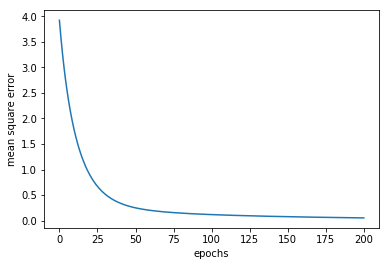

In [16]:
# plot learning curve
plt.figure(1)
plt.plot(range(i), mse)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.show()

If $x = \left( x_1,x_2,x_3 \right)^T $, the learned function by the linear neuron:

<center>$y=w^Tx + b$</center>

3 = !4, + +
3 = 0.37 2.57 −0.21
-.
-0
-1
− 1.17
3 = 0.37-. + 2.57-0 − 0.21-1 − 1.17 

Predicted values: <br>
<center>x: [-0.63 -0.78 -0.56], d: -3.21, y: -3.28035 </center>
<center>x: [ 0.96 0.62 -0.66], d: 1.05, y: 0.919454  </center> 
<center>x: [ 0.09 -0.44 -0.15], d: -2.57, y: -2.22926  </center> 
<center>x: [ 0.88 0.64 -0.33], d: 0.66, y: 0.871378  </center> 
<center>x: [ 0.34 0.65 -0.73], d: 0.96, y: 0.782616  </center> 
<center>x: [ 0.15 0.78 -0.58], d: 1.04, y: 1.01435  </center> 
<center>x: [ 0.69 -0.99 -0.76], d: -2.97, y: -3.29005  </center> 
<center>x: [ 0.63 -0.45 -0.14], d: -2.39, y: -2.0579  </center> 

In [17]:
for i in range(len(X)):
  result = (train1pattern())
  print('x: %s, d: %g, y: %g'%(result['x'], result['d'], result['y']))

x: [ 0.69 -0.99 -0.76], d: -2.97, y: -3.29294
x: [ 0.09 -0.44 -0.15], d: -2.57, y: -2.22726
x: [ 0.63 -0.45 -0.14], d: -2.39, y: -2.06067
x: [ 0.15  0.78 -0.58], d: 1.04, y: 1.00826
x: [ 0.34  0.65 -0.73], d: 0.96, y: 0.77732
x: [ 0.96  0.62 -0.66], d: 1.05, y: 0.916026
x: [-0.63 -0.78 -0.56], d: -3.21, y: -3.28063
x: [-0.63 -0.78 -0.56], d: -3.21, y: -3.279
